This notebook generates an image by doing what's done inside of a pipeline.

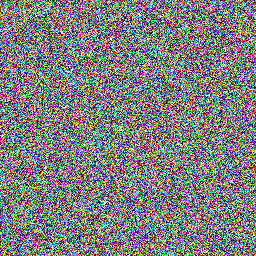

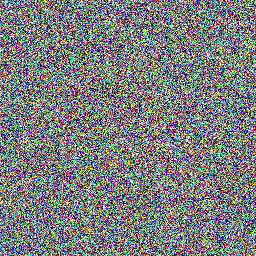

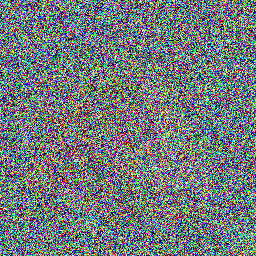

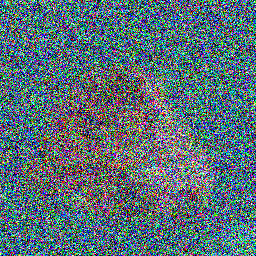

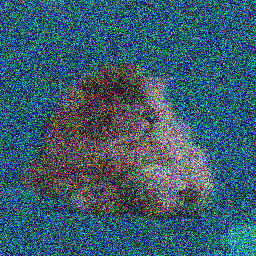

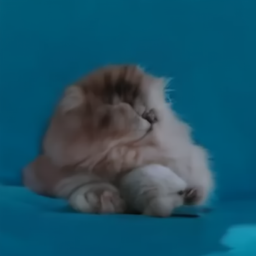

In [13]:
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
from IPython.display import display
import torch

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")
scheduler.set_timesteps(50)

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size), device="cuda")
input = noise

def to_image(input):
    image = (input / 2 + 0.5).clamp(0, 1)
    image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
    image = Image.fromarray((image * 255).round().astype("uint8"))
    return image
    
i = 0
for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample
        if i%10 == 0:
            display(to_image(input))
        i += 1
        
display(to_image(input))